In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.special import jn_zeros, j1

In [12]:
#-----------------------------------------------------------------------------

# DADOS VARIÁVEIS DA CONSTELAÇÃO
QS = 49 #satélites, quantidade por plano
A = 1200 # em km, altitude
EIRPdBW = -3.4 #em dBW, potência
EIRPW = 10**(EIRPdBW/10)
NSLdB = -24 #nível do lóbulo lateral
NSL = 10**(NSLdB/10) #nível do lóbulo lateral em linear
D = 0.6   #em m, diâmetro da antena
f = 11.7*(10**9) #em Hz, frequência central
T = 60 # tempo em minutos da simulação

#--------------------------------------------------------------------

#CONSTANTES RELACIONADAS A TERRA
R = 6378.1 #em km, raio da Terra
G = 6.6743*(10**(-11)) #em m3/(kg*s2), constante gravitacional
M = 5.9742*(10**24) #em kg, massa da Terra

print(' ')
print('CONSTANTES RELACIONADAS A TERRA:')
print('G = ', G, 'm3/(kg*s2), constante gravitacional')
print('M = ', round(M, 2), 'kg, massa da Terra')
print('R = ', round(R, 2), 'km, raio da Terra')
print(' ')

print('DADOS DA CONSTELAÇÃO:')
print('Número de satélites por plano orbital:', QS)
print('Altitude da constelação:', A, 'km')
print('Potência de cada satélite:', EIRPdBW, 'dBW ou', round(EIRPW, 2), 'W')
print('Nível do lóbulo lateral (Gt(Theta)/Gtmax):', NSLdB, 'dB ou', round(NSL, 2))
print(' ')

 
CONSTANTES RELACIONADAS A TERRA:
G =  6.6743e-11 m3/(kg*s2), constante gravitacional
M =  5.974199999999999e+24 kg, massa da Terra
R =  6378.1 km, raio da Terra
 
DADOS DA CONSTELAÇÃO:
Número de satélites por plano orbital: 49
Altitude da constelação: 1200 km
Potência de cada satélite: -3.4 dBW ou 0.46 W
Nível do lóbulo lateral (Gt(Theta)/Gtmax): -24 dB ou 0.0
 


In [14]:
# Distância dos satélites ao centro da Terra
RA = R+A # em km

print('CÁLCULOS RELACIONADOS AOS SATÉLITES NGEO:')

#Velocidade dos satélites
v = (((G*M)/(RA*1000))**(1/2)) #em m/s
vk = v*3.6 #em km/h
print('VELOCIDADE:')
print('Velocidade de cada satélite:', round(v, 2), 'm/s ou', round(vk, 2), 'km/h')
print(' ')

#Distâncias percorridas
Pi = math.pi
P = 2*Pi*RA #perímetro total a 1200 km de altura
print('DISTÂNCIAS:')
print('Perímetro total ao redor da Terra a', A, 'km:', round(P, 2), 'km')

#Arco visível
alfa = round((np.arccos(R/RA))*(180/Pi), 2) #Até metade do arco, em graus
walfa = 2*alfa #Arco total, graus
Dwalfa = round((P*walfa)/360, 2) #Arco total, em km
print('Ângulo inicial em relação ao centro da Terra', alfa, 'graus')
print('Arco em que os satélites são vísiveis:', walfa, 'graus ou', Dwalfa, 'km')

# Distância entre satélites
DS = P/QS
print('Distância entre os satélites:', round(DS, 2), 'km')
print(' ')

#Tempo entre os satélites
TS = (DS/vk)*60
print('TEMPOS:')
print('Tempo entre dois satélites:', round(TS,2), 'min')

#Tempo do arco visível
TA = (Dwalfa/vk)*60
print('Tempo para percorrer o arco visível a', A, 'km:', round(TA, 2), 'min')
print(' ')

#Quantidade de satélites visíveis ao mesmo tempo
QV = TA / TS

#Tempo inicial para todos os satélites no arco
S = math.floor(QV) # mínimo de satélites vísiveis
S1 = int(np.ceil(QV))
Ti = S*TS #tempo com máximo de satélites visíveis
Tii = Ti - (TA - TS) #tempo em que são vistos o mínimo de satélites

print('Durante', round(TA-Tii, 2), 'min', S1, 'satélites estarão visíveis. Por', round(Tii, 2), 'min, apenas', S, 'satélites estarão visíveis.')
print(' ')

CÁLCULOS RELACIONADOS AOS SATÉLITES NGEO:
VELOCIDADE:
Velocidade de cada satélite: 7253.75 m/s ou 26113.5 km/h
 
DISTÂNCIAS:
Perímetro total ao redor da Terra a 1200 km: 47614.61 km
Ângulo inicial em relação ao centro da Terra 32.69 graus
Arco em que os satélites são vísiveis: 65.38 graus ou 8647.34 km
Distância entre os satélites: 971.73 km
 
TEMPOS:
Tempo entre dois satélites: 2.23 min
Tempo para percorrer o arco visível a 1200 km: 19.87 min
 
Durante 19.64 min 9 satélites estarão visíveis. Por 0.23 min, apenas 8 satélites estarão visíveis.
 


In [15]:
print('CÁLCULOS RELACIONADOS A ESTAÇÃO TERRENA:')
#DADOS RELACIONADOS A ESTAÇÃO TERRENA

c = 2.998*(10**8) #em m/s, velocidade da luz
print('CONSTANTES:')
print('Diâmetro da antena:', D, 'm')
print('Frequência central:', f, 'Hz')
print('Velocidade da luz:', c, 'm/s')
print(' ')

CÁLCULOS RELACIONADOS A ESTAÇÃO TERRENA:
CONSTANTES:
Diâmetro da antena: 0.6 m
Frequência central: 11700000000.0 Hz
Velocidade da luz: 299800000.0 m/s
 


PARÂMETROS PARA O DIAGRAMA DE ANTENA DA ESTAÇÃO TERRENA:
Diâmetro pelo comprimento de onda da Estação Terrena (lambda): 23.42
Gmax = 35.09 dBi ou 3228.58
G1 = 13.79 dBi
Phim = 3.94 degrees


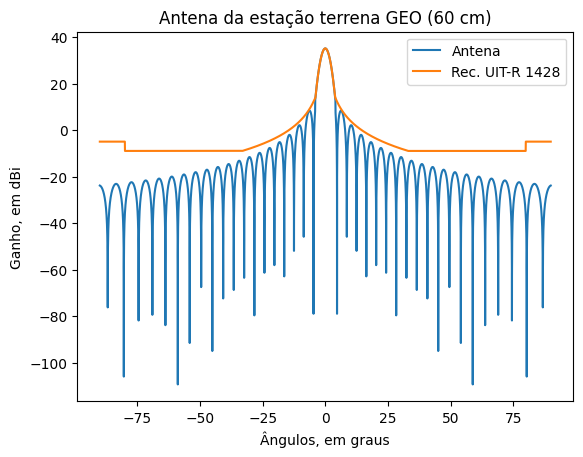

In [16]:
#DIAGRAMA DE ANTENA
#Diâmetro sobre o comprimento de onda
print('PARÂMETROS PARA O DIAGRAMA DE ANTENA DA ESTAÇÃO TERRENA:')

Dlambda = D/(c/f)
print('Diâmetro pelo comprimento de onda da Estação Terrena (lambda):', round(Dlambda, 2))

#Ganho máximo da antena, em dBi
GmaxdBi = 20*(math.log(Dlambda, 10))+7.7

#Ganho máximo da antena, W
Gmax=10**(GmaxdBi/10)
print('Gmax =', round(GmaxdBi,2), 'dBi ou', round(Gmax,2))

G1 = 29 - 25*(math.log(95/Dlambda, 10))
print('G1 =', round(G1, 2), 'dBi')

phim = (20/Dlambda)*((GmaxdBi-G1)**(1/2))
print('Phim =', round(phim, 2), 'degrees')

#Diagrama de antena da estação terrena

# Ângulo, eixo x, -90 a 90 graus
An = [-90]
xa = -90

while xa < 90:
    xa = round(xa + 0.01, 2)
    An.append(xa)

def gain_ant_s1528_taylor_circ(theta, wavelength, D, Gmax, SLR, num_sidelobes, epsilon=1e-10):
    """
    Calculates the gain of a satellite antenna in a non-GEO satellite system,
    following the ITU-R Recommendation S.1528, item 1.4 for the Fixed Satellite
    Service (FSS) below 30 GHz, taking into account the sidelobe effects.

    Parameters:
    - theta (float or np.ndarray): Angle between the direction to Earth's center (subsatellite point) and the test point (in degrees).
    - wavelength (float): Wavelength of the lowest frequency of interest (in meters).
    - DN (float): Diameter of the antenna in meters.
    - Gmax (float): Maximum gain of the antenna pattern (in dBi).
    - SLR (int): Sidelobe ratio of the antenna pattern (in dB).
    - num_sidelobes (int): Number of sidelobes considered in the pattern.
    - epsilon (float): Small value to prevent division by zero.

    Returns:
    - G (float or np.ndarray): Gain G(u) in the direction of the specified point (in dBi).
    """
    # Step 1: Calculate A
    A = (1 / np.pi) * np.arccosh(10 ** (SLR / 20))

    # Step 2: Calculate the Bessel function roots for J1 to find σ and μ values
    J1_roots = jn_zeros(1, num_sidelobes) / np.pi
    sigma = J1_roots[-1] / np.sqrt(A ** 2 + (num_sidelobes - 0.5) ** 2)
    mu = J1_roots[:num_sidelobes - 1]  # μ_i values for i = 1 to num_sidelobes - 1

    # Step 3: Calculate u based on DN and theta
    u = (np.pi * D / wavelength) * np.sin(theta)
    u = np.maximum(u, epsilon)  # Replace any zero or very small values with epsilon

    # Step 4: Calculate the product term safely
    product_term = np.ones_like(u)
    for i, mi in enumerate(mu, start=1):
        numerator = 1 - (u ** 2) / (np.pi ** 2 * sigma ** 2 * (A ** 2 + (i - 0.5) ** 2))
        denominator = 1 - (u / (np.pi * mi)) ** 2
        product_term *= np.where(denominator != 0, numerator / denominator, 0)

    # Step 5: Safely calculate G(u) with a small epsilon in the logarithm
    gain_term = np.where(u != 0, 2 * j1(u) / u, 0)
    G = Gmax + 20 * np.log10(np.abs(gain_term * product_term) + epsilon)  # Adding epsilon to avoid log(0)

    # Replace any undefined values with -inf for clarity in plotting
    G = np.nan_to_num(G, nan=-np.inf)

    return G

#Parâmetros para diagrama da estação terrena
wavelength = c/f
SLR = 35
W = 0
num_sidelobes = 1

#Ganho máximo da antena, em dBi
GmaxdBi = 20 * (math.log(Dlambda, 10)) + 7.7
G1 = 29 - 25 * (math.log(95/Dlambda, 10))

#Criando o diagrama de antena
GndB = []
W = 0

for i in range(len(An)):
    Phi = abs(An[i]) #de -90 a 90
    theta = abs(An[i]/90) #de -1 a 1

    if Phi >= 0 and Phi < (95/Dlambda):
        W = GmaxdBi - (2.5*10**(-3))*((Dlambda*Phi)**2)

    if Phi >= (95/Dlambda):
        W = gain_ant_s1528_taylor_circ(theta, wavelength, D, GmaxdBi, SLR, num_sidelobes) - SLR/3.8

    GndB.append(W)

#Envoltória da Recomendação UIT-R 1428
Env = []
a = 0

for i in range(len(An)):
    Phi = abs(An[i])

    if Phi >= 0 and Phi < phim:
        a = GmaxdBi - (2.5*10**(-3))*((Dlambda*Phi)**2)

    if Phi >= phim and Phi < (95*1/Dlambda):
        a = G1

    if Phi >= (95*1/Dlambda) and Phi < 33.1:
        a = 29 - 25 * (np.log10(Phi))

    if Phi > 33.1 and Phi <= 80:
        a = -9

    if Phi > 80 and Phi <= 180:
        a = -5

    Env.append(a)

plt.title("Antena da estação terrena GEO (60 cm)")
plt.xlabel("Ângulos, em graus")
plt.ylabel("Ganho, em dBi")
plt.plot(An, GndB, label = 'Antena')
plt.plot(An, Env, label = 'Rec. UIT-R 1428')
plt.legend()
plt.show()

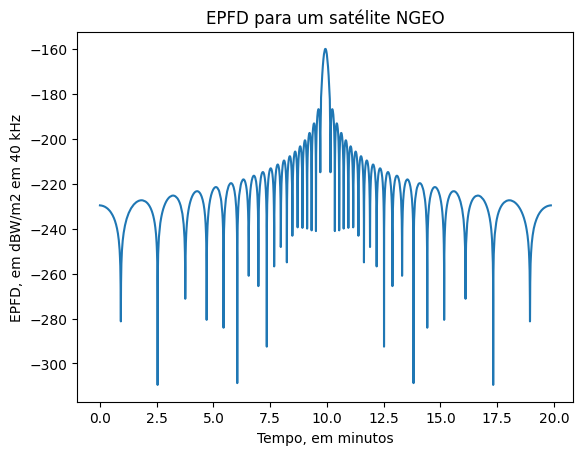

In [17]:
#Cálculando a EPFD para um satélite
EPFDU = [] #EPFD para um satélite
Af=[]

#Calculando alfa
alfa1 = alfa
Af.append(alfa1)

#Até zero
while alfa1 != 0:
    alfa1 = round(alfa1 - 0.01, 2)
    Af.append(alfa1)

#Até o alfa novamente
while alfa1 != alfa:
    alfa1 = round(alfa1 + 0.01, 2)
    Af.append(alfa1)

#Calculando o Beta
Bt=[]
for i in range(len(Af)):
    Bt.append(round(90 - Af[i], 2))

#Calculando a distância do satélite NGEO a estação terrena GEO e o ângulo deltha
Dt = [] #distância
Deltha = [] #ângulo do satélite NGEO em relação ao plano da estação terrena GEO
for i in range(len(Bt)):
    x = np.sin(Bt[i] * Pi / 180) * RA

    # Calculando y
    y = np.cos(Bt[i] * Pi / 180) * RA

    # Calculando z
    z = x - R

    # Calculando a distância entre o satélite NGEO e a estação terrena GEO
    D = round(((z ** 2) + (y ** 2)) ** (1 / 2), 2)

    # Calculando o ângulo deltha
    Dh = round((np.arcsin(z/D)*180/Pi), 2)

    Dt.append(D) # lista de distâncias
    Deltha.append(abs(Dh)) # lista de ângulos deltha

Phi = []
# Ângulo phi = 90 - Deltha, ângulo do satélite NGEO em relação a estação terrena GEO
for i in range(len(Deltha)):
    Phi.append(abs(round(90 - Deltha[i], 2)))

GPhi = []
# Obtendo os ganhos da antena da estação terrena GEO na direção do satélite GEO
for i in range(len(Phi)):
    ian = Phi[i] # qual o ângulo do ganho
    ig = An.index(ian) #qual o indice do ganho
    GdB = GndB[ig] #qual o ganho
    GPhi.append(10**(GdB/10)) #o ganho em linear

#Variáveis fixas em linear (EIRP, nível do lóbulo lateral, constantes e ganho máximo)
Vf = (EIRPW*NSL)/(4*Pi*(10**6)*Gmax)

#EPFD para um satélite em linear
EPFDl=[]
for i in range(len(GPhi)):
    EPFDl.append(Vf * GPhi[i]/(Dt[i]**2))

EPFDdB=[]
for i in range(len(GPhi)):
    EPFDdB.append(10*(np.log10(EPFDl[i])))

TU = [] #tempo para um satélite
UT = TA/(len(GPhi)) #unidade de tempo

for i in range(len(GPhi)):
    TU.append(UT*i)

#EPFD para um satélite
plt.title("EPFD para um satélite NGEO")
plt.xlabel("Tempo, em minutos")
plt.ylabel("EPFD, em dBW/m2 em 40 kHz")
plt.plot(TU, EPFDdB)
plt.show()

60 minutos é equivalente a 19747 interações
EPFD máximo = -159.98 dBW/m2 em 40 kHz


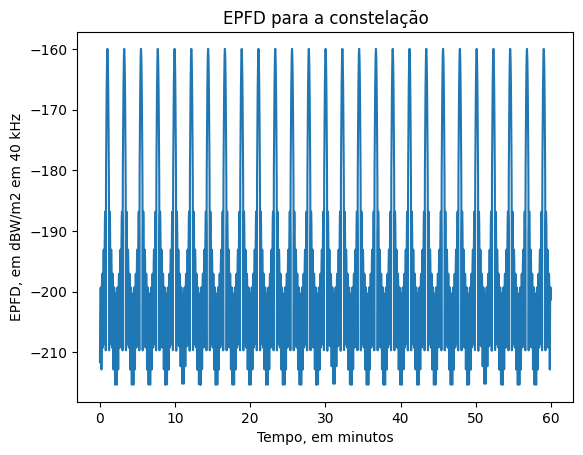

In [18]:
# Fazendo o cálculo para toda a constelação
# Contando quantas interações no tempo com menos satélites
iTii = 0
while UT * iTii <= Tii:
    iTii = iTii + 1

#Adicionando zeros ao final da lista de um satélite para representar o tempo com menos satélites
EPFDl1 = EPFDl
for i in range(iTii):
    EPFDl1.append(0)

k = len(EPFDl1) #tamanho da lista inicial

# Contando quantas interações no tempo entre os satélites
iTS = 0
while UT * iTS <= TS:
    iTS = iTS + 1

#Transformando tempo em minutos em número de interações
N = int(np.ceil(T/UT))
print(T, 'minutos é equivalente a', N, 'interações')

#Criando uma lista para ser usada nas interações
iL = int(np.ceil(N/k)+1)

EPFDl2 = []
for i in range(iL):
    EPFDl2 = EPFDl2 + EPFDl1

#Criando a lista com os valores de EPFD para a constelação
i = 1 #iterador master
w1 = 0 #valor inicial de EPFDl1
sat = 0 #iterador de satélites
EPFDtl = []
EPFDtdB = []
Tt = []

while i <= N:

    #somando todos os satélites com offset em linear
    while sat <= S:
        w1 = w1 + EPFDl2[i+(sat*iTS)] #somando os satélites visíveis
        sat = sat + 1
    EPFDtl.append(w1)

    #transformando a soma de todos os satélites para dB
    w2 = 10*(np.log10(w1))
    EPFDtdB.append(w2)

    #criando a lista de tempo
    Tt.append(UT*i)

    i = i + 1
    sat = 0
    w1 = 0

print('EPFD máximo =', round(max(EPFDtdB), 2), 'dBW/m2 em 40 kHz')

#EPFD para um satélite
plt.title("EPFD para a constelação")
plt.xlabel("Tempo, em minutos")
plt.ylabel("EPFD, em dBW/m2 em 40 kHz")
plt.plot(Tt, EPFDtdB)
plt.show()